In [37]:
# !pip install --upgrade scikit-learn

In [3]:
import sklearn
print(sklearn.__version__)

1.5.0


In [5]:
!python --version

Python 3.11.7


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv',delimiter = '\t', quoting = 3)

In [3]:
dataset.head() 

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


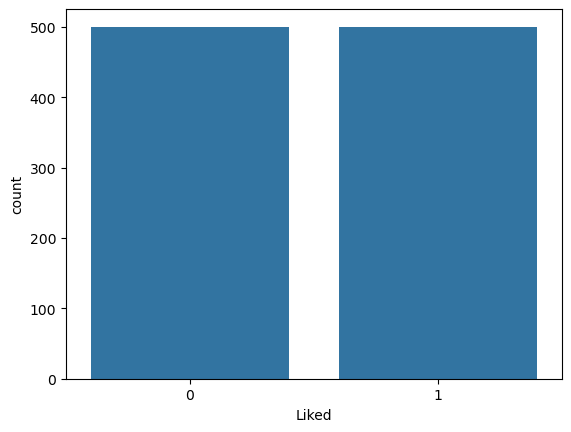

In [5]:
sns.countplot(data=dataset,x='Liked')
plt.show() 

In [6]:
dataset['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [7]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [13]:
# Lower case
# Tokenization
# Removing special characters
# Removing stop words and punctuation
# Stemming

In [8]:
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.porter import PorterStemmer

In [9]:
stop = list(punctuation)+stopwords.words('english')

In [10]:
ps = PorterStemmer()

In [11]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)   
    
    text = y[:]
    y.clear()
    for i in text:
        if i not in stop:
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [12]:
dataset['Transform_text'] = dataset['Review'].apply(transform)

In [13]:
dataset.head()

,Review,Liked,Transform_text
0,Wow... Loved this place.,1,wow love place
1,Crust is not good.,0,crust good
2,Not tasty and the texture was just nasty.,0,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,select menu great price


In [14]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [15]:
wc_1 = wc.generate(dataset[dataset['Liked']==1]['Transform_text'].str.cat(sep = " "))

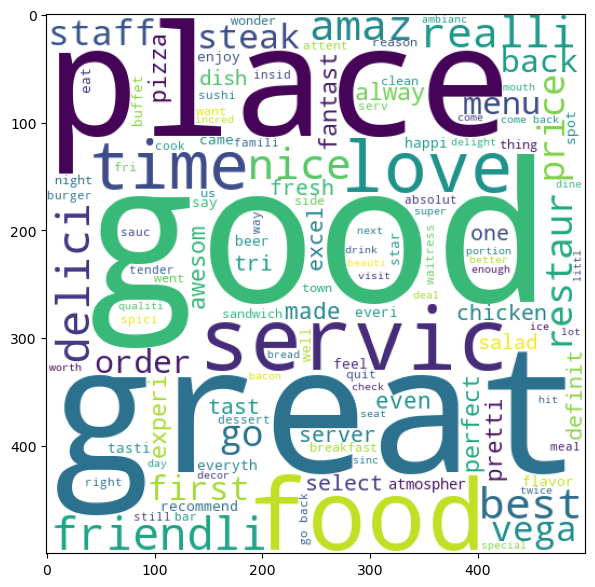

In [16]:
plt.figure(figsize=(14,7))
plt.imshow(wc_1)
plt.show() 

In [17]:
wc_0 = wc.generate(dataset[dataset['Liked']==0]['Transform_text'].str.cat(sep = " "))

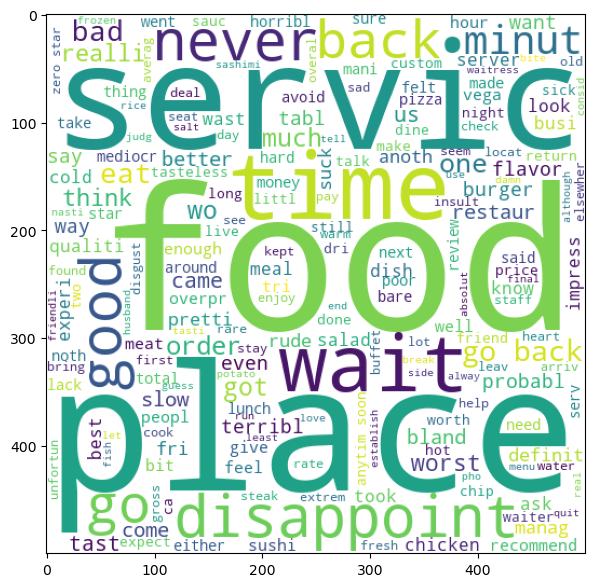

In [18]:
plt.figure(figsize=(14,7))
plt.imshow(wc_0)
plt.show() 

In [19]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [20]:
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [27]:
# x = cv.fit_transform(dataset['Transform_text']).toarray()

In [21]:
tfidf.fit(dataset['Transform_text'])

TfidfVectorizer()

In [22]:
x = tfidf.transform(dataset['Transform_text']).toarray() 

In [23]:
x.shape

(1000, 1558)

In [24]:
y = dataset['Liked']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=101) 

In [26]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [27]:
bnb = BernoulliNB()
mnb = MultinomialNB()
gnb = GaussianNB()

In [28]:
bnb.fit(X_train,Y_train)
predicttion1 = bnb.predict(X_test)
print(accuracy_score(Y_test,predicttion1)*100)
print(precision_score(Y_test,predicttion1)*100)
print(confusion_matrix(Y_test,predicttion1))

76.0
71.55172413793103
[[69 33]
 [15 83]]


In [29]:
mnb.fit(X_train,Y_train)
predicttion2 = mnb.predict(X_test)
print(accuracy_score(Y_test,predicttion2)*100)
print(precision_score(Y_test,predicttion2)*100)
print(confusion_matrix(Y_test,predicttion2))

78.0
73.27586206896551
[[71 31]
 [13 85]]


In [30]:
gnb.fit(X_train,Y_train) 
predicttion3 = gnb.predict(X_test)
print(accuracy_score(Y_test,predicttion3)*100)
print(precision_score(Y_test,predicttion3)*100)
print(confusion_matrix(Y_test,predicttion3))

66.0
63.1578947368421
[[60 42]
 [26 72]]


In [31]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))

In [36]:
# pip freeze > requirements.txt